In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("..")

In [2]:
D4_train = torch.load("data/MNIST/D4/training.pt")
C4_train = torch.load("data/MNIST/C4/training.pt")

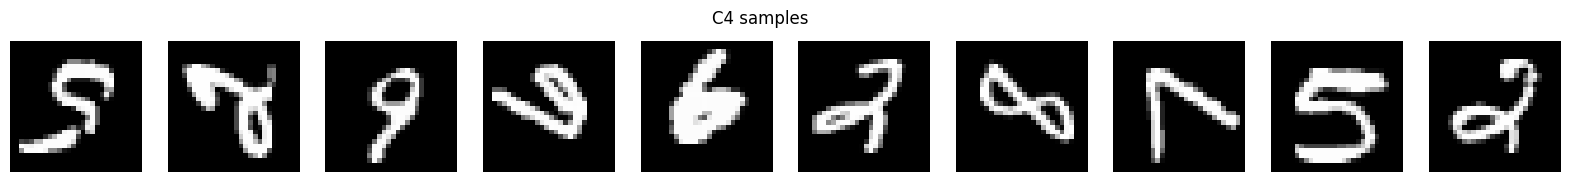

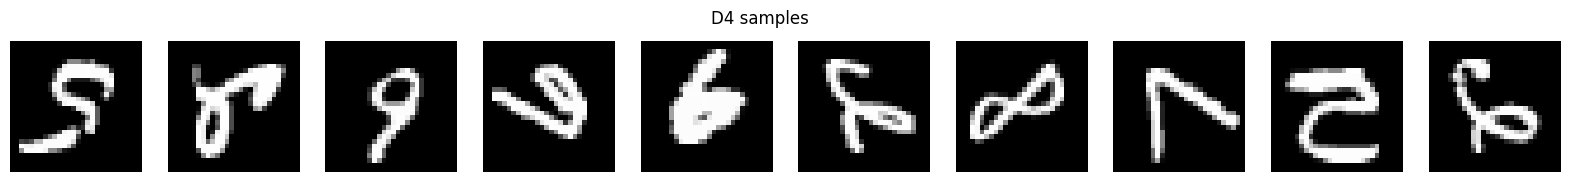

In [3]:
def plot_samples(data, title):
    fig, ax = plt.subplots(1, 10, figsize=(20, 2))
    for i in range(10):
        ax[i].imshow(data[i][0], cmap='gray')
        ax[i].axis('off')
    fig.suptitle(title)
    plt.show()

random_idx = np.random.randint(0, len(D4_train[0]), 10)

plot_samples(C4_train[0][random_idx], "C4 samples")
plot_samples(D4_train[0][random_idx], "D4 samples")

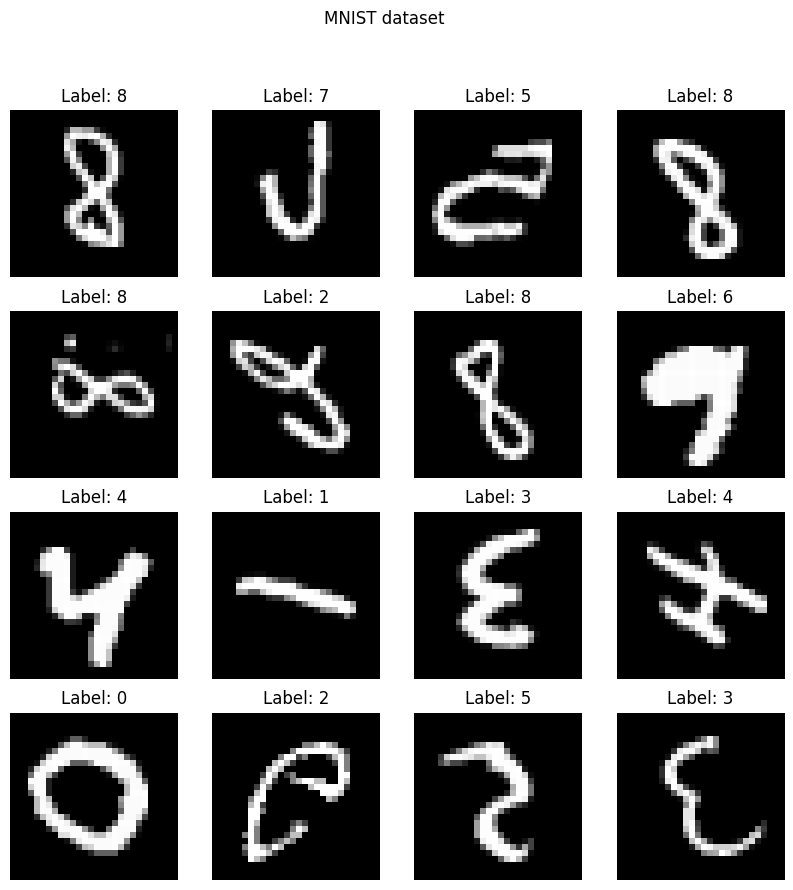

In [4]:
# Plot 16 random images from the dataset
def plot_images(images, labels, title):
    images = images.reshape(-1, 28, 28)
    fig, axs = plt.subplots(4, 4, figsize=(10, 10))
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(images[i * 4 + j], cmap="gray")
            axs[i, j].axis("off")
            axs[i, j].set_title(f"Label: {labels[i * 4 + j]}")
    plt.suptitle(title)
    plt.show()

# Load the dataset
X, y = D4_train
X = X.numpy()
y = y.numpy()

idx = np.random.choice(len(X), 16, replace=False)
# Plot 16 random images from the dataset
plot_images(X[idx], y[idx], "MNIST dataset")


torch.Size([8, 1, 28, 28])


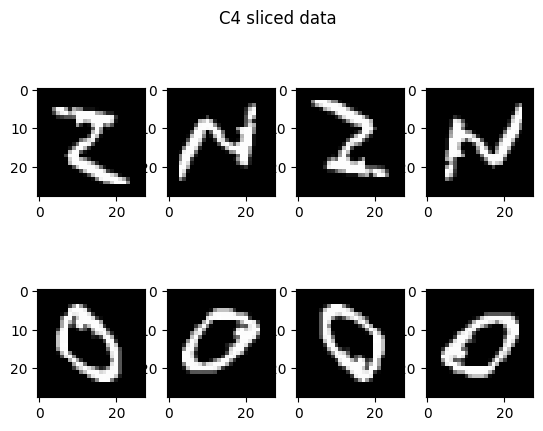

torch.Size([16, 1, 28, 28])


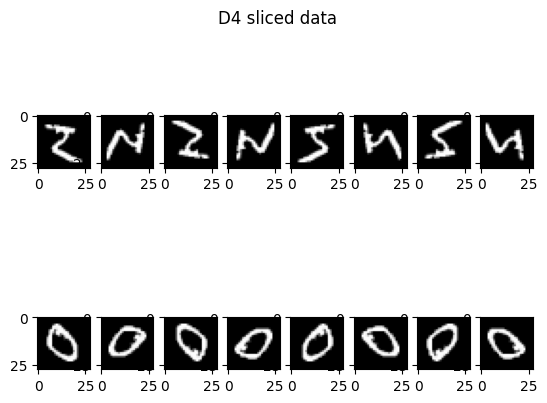

In [5]:
from src import *

Xp = C4_Slice()(torch.tensor(X[:2,...]))
print(Xp.shape)

# Plot all images
fig, axs = plt.subplots(2, 4)
plt.suptitle("C4 sliced data")
for i in range(8):
    axs[i//4, i%4].imshow(Xp[i,...].squeeze(0).numpy(), cmap="gray")

plt.show()

Xp = D4_Slice()(torch.tensor(X[:2,...]))
print(Xp.shape)

# Plot all images
fig, axs = plt.subplots(2, 8)
plt.suptitle("D4 sliced data")
for i in range(16):
    axs[i//8, i%8].imshow(Xp[i,...].squeeze(0).numpy(), cmap="gray")

plt.show()

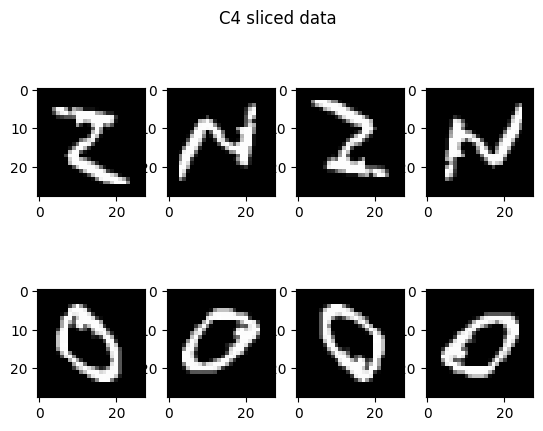

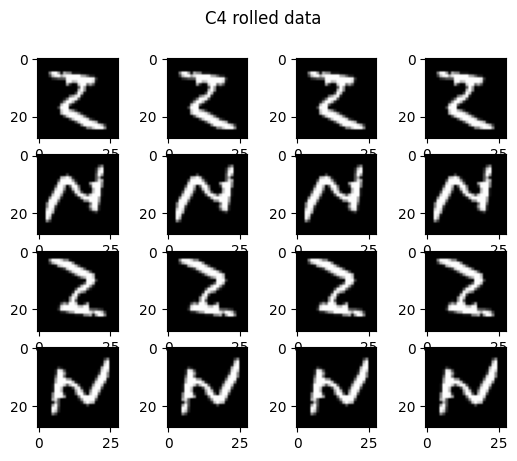

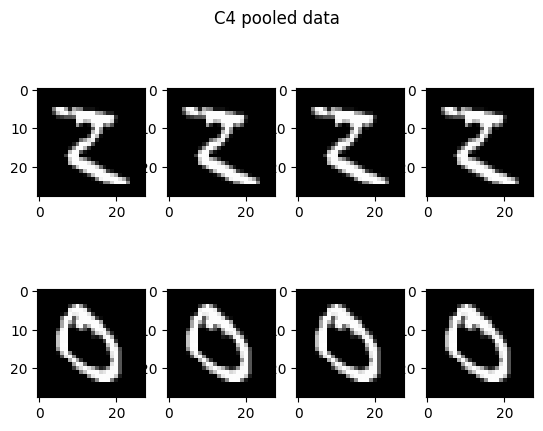

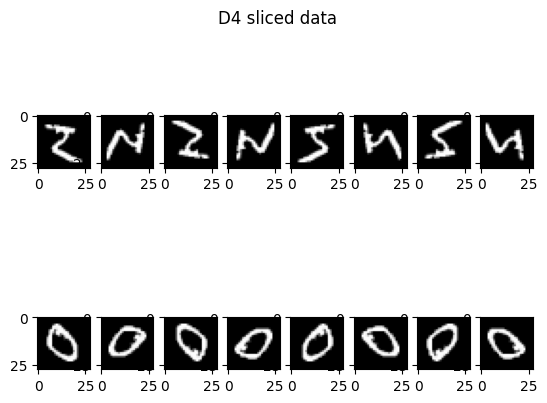

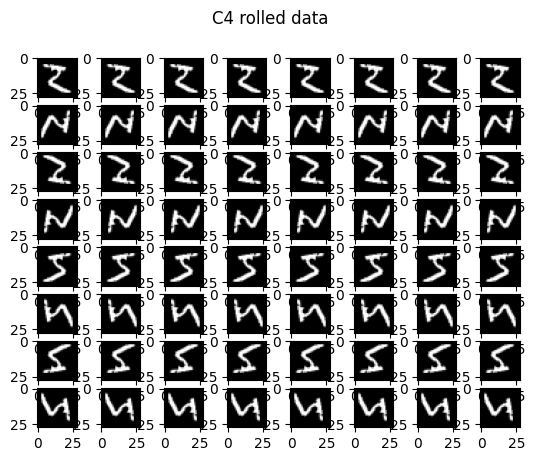

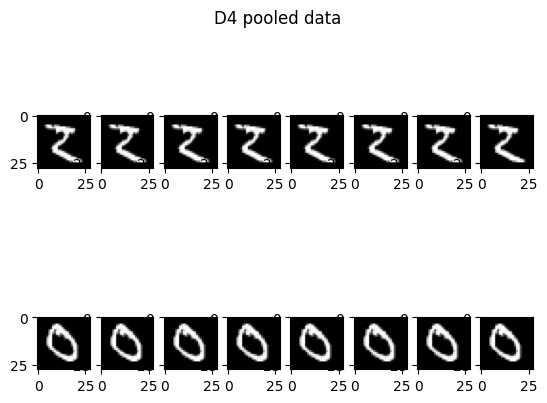

In [6]:
Xp = C4_Slice()(torch.tensor(X[:2,...]))

# Plot all images
fig, axs = plt.subplots(2, 4)
plt.suptitle("C4 sliced data")
for i in range(8):
    axs[i//4, i%4].imshow(Xp[i,...].squeeze(0).numpy(), cmap="gray")

plt.show()

Xr = C4_Roll()(Xp)
fig, axs = plt.subplots(4, 4)
plt.suptitle("C4 rolled data")
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(Xr[i,j,...].numpy(), cmap="gray")


Xp = C4_Pool()(Xr)
# Plot all images
fig, axs = plt.subplots(2, 4)
plt.suptitle("C4 pooled data")
for i in range(2):
    for j in range(4):
        axs[i, j].imshow(Xp[i,j,...].numpy(), cmap="gray")

plt.show()

Xp = D4_Slice()(torch.tensor(X[:2,...]))

# Plot all images
fig, axs = plt.subplots(2, 8)
plt.suptitle("D4 sliced data")
for i in range(16):
    axs[i//8, i%8].imshow(Xp[i,...].squeeze(0).numpy(), cmap="gray")

plt.show()

Xr = D4_Roll()(Xp)
fig, axs = plt.subplots(8, 8)
plt.suptitle("C4 rolled data")
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(Xr[i,j,...].numpy(), cmap="gray")

Xp = D4_Pool()(Xr)
# Plot all images
fig, axs = plt.subplots(2, 8)
plt.suptitle("D4 pooled data")
for i in range(2):
    for j in range(8):
        axs[i, j].imshow(Xp[i,j,...].numpy(), cmap="gray")

plt.show()